In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score


Load the Dataset

In [70]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.shape

(891, 12)

In [73]:
df.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling the missing values....



In [76]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [77]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [78]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [79]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [80]:
df=df.drop(['PassengerId','Cabin','Ticket'],axis=1)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C


In [81]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


#### Extractin new features

In [82]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Lady', 'Countess', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Don', 'Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Jonkheer'], 'Officer')
df['Title'] = df['Title'].replace(['Dona'], 'Mrs')


In [68]:
df=df.drop(['Name'],axis=1)

# Data Visualization

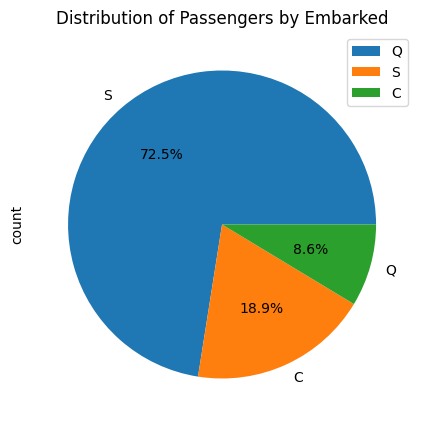

In [107]:
ax=df['Embarked'].value_counts().plot(kind='pie',figsize=(6,5),autopct='%1.1f%%')
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()


### Visualize survival rate by FamilySize

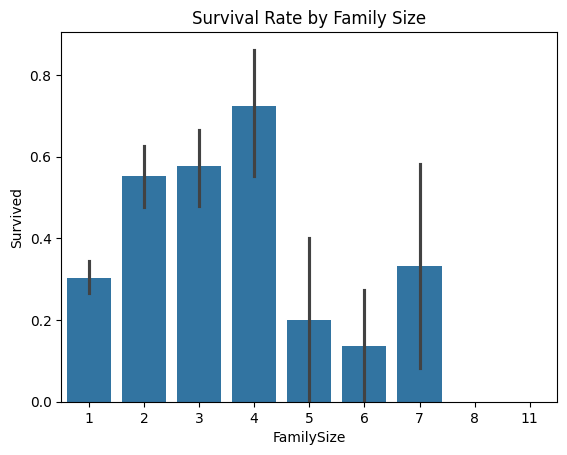

In [88]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()


### Visualize survival rate by Pclass

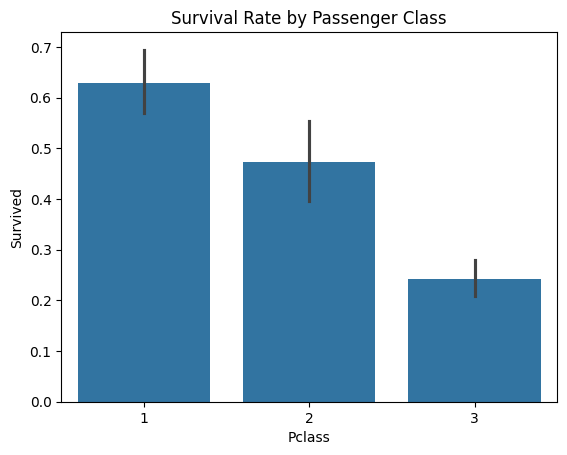

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

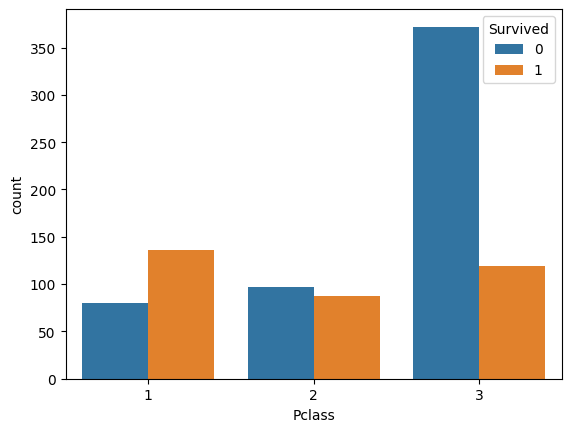

In [92]:
sns.countplot(x='Pclass',hue='Survived',data=df)

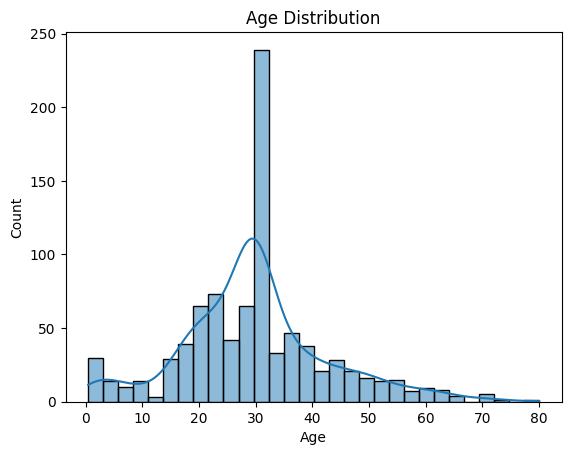

In [110]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()



### show survived with respect to Embarked


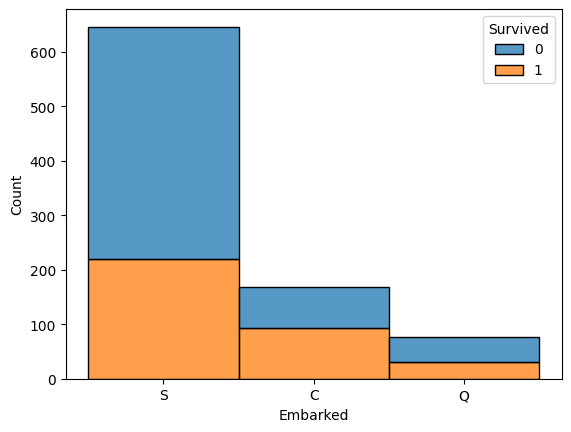

In [95]:
sns.histplot(x=df['Embarked'], hue=df['Survived'], multiple='stack')
plt.show()

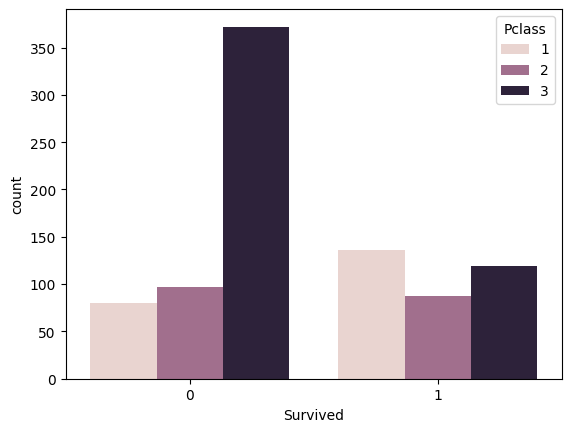

In [96]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])
plt.show()

## Featuring Engineering



In [111]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [20]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [21]:
X=df[features]
Y=df['Survived']

##### Split data into test and train by using Sklearn library



In [22]:


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

#### Create training Model



In [23]:

model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [37]:
pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(pred, Y_test)
print('Accuracy score of test data is : ',testing_data_accuracy)

Accuracy score of test data is :  0.8379888268156425


### Feature Importance

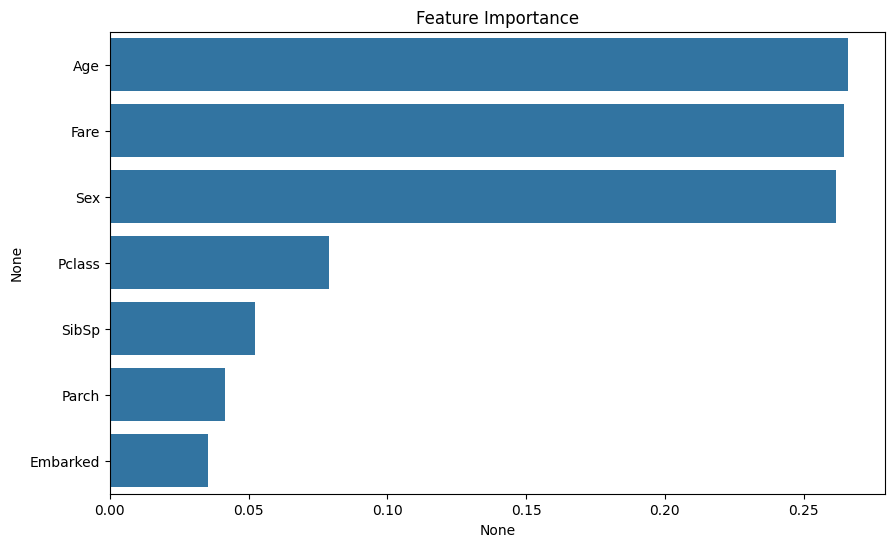

In [105]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

In [40]:
cm=confusion_matrix(Y_test,pred)
cm

array([[99, 11],
       [18, 51]], dtype=int64)

In [106]:
print('test data recall is :', recall_score(Y_test, pred))

test data recall is : 0.36231884057971014


### Support Vector Machine Model

In [101]:
from sklearn.svm import SVC
svm=SVC()

model2=svm.fit(X_train,Y_train)
pred=svm.predict(X_test)

In [42]:
accuracy=accuracy_score(Y_test,pred)
confusion_matrix=confusion_matrix(Y_test,pred)
print(confusion_matrix)
print(accuracy)

[[99 11]
 [18 51]]
0.8379888268156425


### Predicting New Values

In [43]:
def res(r):
    if(r == 0):
        print("Not Survived")
    else:
        print("Survived")

In [99]:
prediction1 = model.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
res(prediction1)


Not Survived


In [100]:
prediction2 = model2.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
res(prediction2)

Not Survived


In [48]:
import warnings
warnings.filterwarnings("ignore")